# Основные концепции Machine Learning. Домашняя работа

In [ ]:
### Тут нужно сделать импорты всех необходимых библиотек ###

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.tree import export_text

In [14]:
### Здесь требуется загрузить датасет phones.csv ###

In [15]:
phones = pd.read_csv("phones.csv")

In [16]:
phones.head(7)

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013
5,512,iOS,15842,2018
6,128,Android,7191,2015


In [17]:
### Опционально: используя matplotlib, можно сделать визуализацию загруженного датасета ###

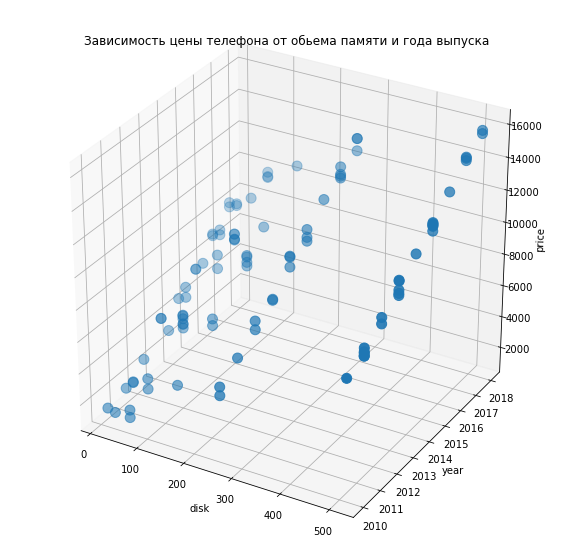

In [27]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")

ax.scatter(phones['disk'], phones['year'], phones['price'], s=100)

ax.set_title('Зависимость цены телефона от обьема памяти и года выпуска')

ax.set_xlabel("disk")
ax.set_ylabel("year")
ax.set_zlabel("price")

plt.show()

Задание 1: обучить модель регрессии

In [21]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = phones[['disk', 'year']]
y = phones['price']

In [ ]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###

In [23]:
reg = LinearRegression().fit(X, y)

In [28]:
reg.predict(X[1:2])[0], phones['price'][1]

(7695.812232594937, 7623)

Задание 2: обучить модель классификации

In [31]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = phones[['disk', 'year']]
y = phones['os']

In [ ]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###

In [32]:
cl = DecisionTreeClassifier().fit(X, y)

In [35]:
print(export_text(cl))

|--- feature_0 <= 192.00
|   |--- class: Android
|--- feature_0 >  192.00
|   |--- class: iOS



In [38]:
cl.predict(X[1:2])[0], y[2]

('Android', 'Android')

Задание 3: обучить модель кластеризации

In [44]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = phones[['disk', 'price', 'year']]

In [45]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###

In [46]:
clust = KMeans(n_clusters=3).fit(X)

In [47]:
[c1, c2, c3] = clust.cluster_centers_

In [48]:
clust.cluster_centers_

array([[  212.17391304,  8323.32608696,  2014.54347826],
       [  410.66666667, 12896.83333333,  2016.20833333],
       [   70.4       ,  3958.53333333,  2012.13333333]])

In [49]:
clust.predict(X[2:3]), phones['os'][2]

(array([2]), 'Android')

In [50]:
clust.predict(X[3:4]), phones['os'][3]

(array([1]), 'iOS')